<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from numpy.random import RandomState
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

In [2]:
RANDOM_STATE = RandomState(12345) 

In [3]:
try :
    data_full = pd.read_csv('gold_recovery_full_new.csv')
    data_test = pd.read_csv('gold_recovery_test_new.csv')
    data_train = pd.read_csv('gold_recovery_train_new.csv')
except:
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')

## Знакомство с данными

In [4]:
data_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


Посмотрим какие значения (столбцы) параметров *сырья на этапе флотации* есть в датасете gold_recovery_train_new

In [5]:
buf = []
for elem in data_train.columns:
    if 'rougher.input' in elem:
        buf.append(elem)
print(buf)

['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate']


Для дальейшего использования определим для себя, что значения pb - это свинец, ag - серебро, au - золото, sol - золь(какое-то вещество) или соль.

Также посмотрим какие значения (столбцы) параметров *продукта на этапе флотации* представлены в датасете gold_recovery_train_new

In [6]:
buf = []
for elem in data_train.columns:
    if 'rougher.output' in elem:
        buf.append(elem)
print(buf)

['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tail_au']


## Подготовка данных

Примерно ознакомившись с данными проверим правильно ли рассчитана **эффективность обогащения** (столбец rougher.output.recovery обучающей выборки). 

In [7]:
C = data_train['rougher.output.concentrate_au']
T = data_train['rougher.output.tail_au']
F = data_train['rougher.input.feed_au']
recovery = (C*(F-T))/(F*(C-T))*100
pd.DataFrame({'Рассчитанные': recovery, 'Данные':data_train['rougher.output.recovery']})

,Рассчитанные,Данные
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
14144,89.574376,89.574376
14145,87.724007,87.724007
14146,88.890579,88.890579
14147,89.858126,89.858126


Как видно на первый взгляд эффективность обогащения были рассчитаны верно. Проверим по метрике MAE.

In [8]:
print(f'{mean_absolute_error(recovery, data_train["rougher.output.recovery"]):.20f}')

0.00000000000000973512


Метрика MAE (очень маленькое значение) подтверждает наше утверждение, данные в столбце "rougher.output.recovery" подсчитаны верно, так как сравниваемые значения очень близки.

 Посмотрим какие признаки **недоступны в тестовой выборке**, но  есть в тренировочной. 

In [9]:
buf=[]
for elem in data_train.columns:
    if elem not in data_test.columns:
        buf.append(elem)
#buf.append('date')
buf

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [10]:
print('Количество столбцов в датасете train:', len(data_train.columns))
print('Количество столбцов в датасете test:', len(data_test.columns))

Количество столбцов в датасете train: 87
Количество столбцов в датасете test: 53


В каждом "этапе" признака есть отсутствующие параметры. Тип отсутствующих параметров это calculate и output.

Чтобы дополнить пропущенные столбцы по дате из исходного датасета сначала посмотрим, каким типо является столбец date.

In [11]:
print(data_train['date'].dtype, data_test['date'].dtype, data_full['date'].dtype)

object object object


Приведем к типу datetime

In [12]:
data_train['date'] = pd.to_datetime(data_train['date'], format="%Y-%m-%d %H:%M:%S")
data_test['date'] = pd.to_datetime(data_test['date'], format="%Y-%m-%d %H:%M:%S")
data_full['date'] = pd.to_datetime(data_full['date'], format="%Y-%m-%d %H:%M:%S")

Дополним столбцы целевых признаков по дате из исходного датасета.

In [13]:
data_test = data_test.merge(data_full[['rougher.output.recovery', 'final.output.recovery', 'date']], how = 'left', left_on='date', right_on='date')


Удалю из train признаки, которые отсутсвуют в test.

In [14]:
buf.remove('rougher.output.recovery')
buf.remove('final.output.recovery')

In [15]:
data_train = data_train.drop(columns=buf, axis=1)

In [16]:
if set(data_train.columns) == set(data_test.columns):
    print('Столбцы в test и train совпадают')
else:
    print('Столбцы в test и train не совпадают')

Столбцы в test и train совпадают


**Посмотрим присутвуют ли пропуски в датафреймах**

In [17]:
pd.options.display.max_rows = 100
passes = data_train.isna().sum()
display(passes[passes!=0])
passes_train = passes[passes!=0].index

primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.floatbank10_sulfate              29
rougher.input.floatbank10_xanthate              8
rougher.input.floatbank11_sulfate              36
rougher.input.floatbank11_xanthate            428
rougher.state.floatbank10_a_air                 1


In [18]:
passes = data_test.isna().sum()
display(passes[passes!=0])
passes_test = passes[passes!=0].index

primary_cleaner.input.sulfate                4
primary_cleaner.input.depressant             5
primary_cleaner.input.xanthate               4
rougher.input.feed_rate                      3
rougher.input.feed_size                      1
rougher.input.feed_sol                      21
rougher.input.floatbank10_sulfate            5
rougher.input.floatbank11_sulfate            8
rougher.input.floatbank11_xanthate          25
secondary_cleaner.state.floatbank2_a_air     3
secondary_cleaner.state.floatbank2_b_air     2
secondary_cleaner.state.floatbank3_a_air     9
dtype: int64

In [19]:
passes = data_full.isna().sum()
display(passes[passes!=0])
passes_full = passes[passes!=0].index

final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 370
primary_cleaner.output.tail_ag                           4
primary_cleaner.output.tail_pb                          21
primary_cleaner.output.tail_sol                         62
primary_cleaner.state.floatbank8_a_air                   4
primary_cleaner.state.floatbank8_a_level                 1
primary_cleaner.state.floatbank8_b_air                  

Используем метод интерполяции для заполнения пропусков, так как наши данные расположены в хронологическом порядке.

In [20]:
data_test[passes_test] = data_test[passes_test].interpolate()
data_train[passes_train] = data_train[passes_train].interpolate()
data_full[passes_full] = data_full[passes_full].interpolate()

Ознакомилилась с датасетами, провела требуюмую обработку данных, а также изменил датасеты train и test. В test были добавлены целевые признаки, а из train наоборот были удалены признаки, которые могут быть получены только в конце или середине техпроцесса. В итоге были получены датасеты подходящие для дальнейшей передачи в модель.

## Анализ данных

 Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Визуализируем концентрацию металлов.

In [21]:
pd.DataFrame(data_full[['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']], )


,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
0,11.500771,8.547551,6.055403
1,11.615865,8.558743,6.029369
2,11.695753,8.603505,6.055926
3,11.915047,7.221879,6.047977
4,12.411054,9.089428,6.148599
...,...,...,...
19434,11.124896,6.559174,3.224920
19435,11.425983,6.612376,3.195978
19436,8.523497,7.128896,3.109998
19437,11.658799,7.490444,3.367241


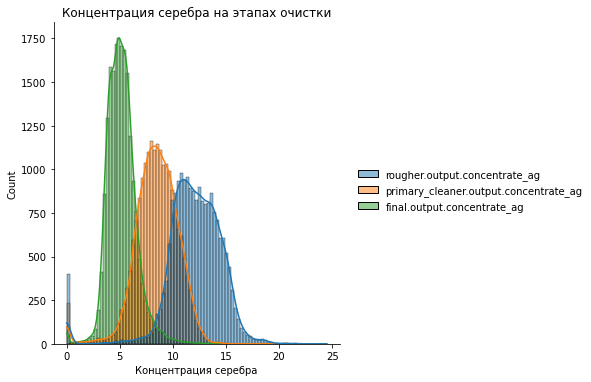

In [22]:
sns.displot(data=data_full[['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']], 
            kind='hist', kde=True)
plt.title("Концентрация серебра на этапах очистки")
plt.xlabel("Концентрация серебра")
plt.show()

In [23]:
pd.DataFrame(data_full[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']], )

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
0,19.793808,34.174427,42.192020
1,20.050975,34.118526,42.701629
2,19.737170,33.969464,42.657501
3,19.320810,28.260743,42.689819
4,19.216101,33.044932,42.774141
...,...,...,...
19434,18.603550,32.940215,46.713954
19435,18.441436,32.925325,46.866780
19436,15.111231,31.856742,46.795691
19437,17.834772,30.770892,46.408188


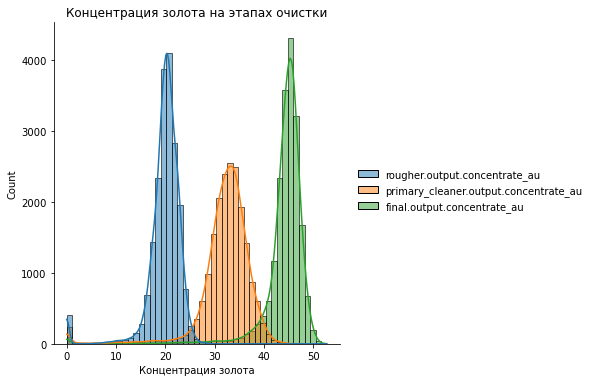

In [24]:
sns.displot(data=data_full[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']], 
            kind='hist', kde=True)
plt.title("Концентрация золота на этапах очистки")
plt.xlabel("Концентрация золота")
plt.show()

In [25]:
pd.DataFrame(data_full[['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']], )

,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
0,7.101074,10.389648,9.889648
1,7.278807,10.497069,9.968944
2,7.216833,10.354494,10.213995
3,7.175616,8.496563,9.977019
4,7.240205,9.986786,10.142511
...,...,...,...
19434,10.984003,12.445966,11.356233
19435,10.888213,12.623947,11.349355
19436,8.955135,12.633558,11.434366
19437,10.655377,12.012378,11.625587


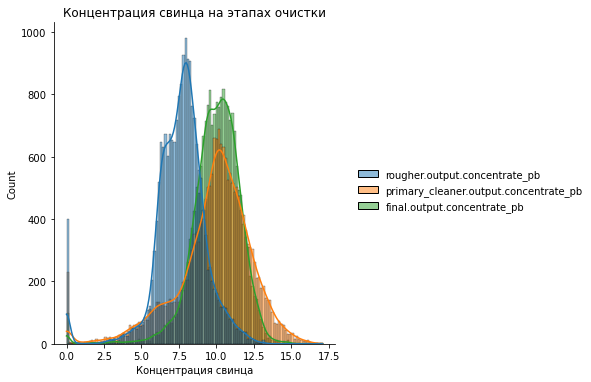

In [26]:
sns.displot(data=data_full[['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']], 
            kind='hist', kde=True)
plt.title("Концентрация свинца на этапах очистки")
plt.xlabel("Концентрация свинца")
plt.show()

По полученным столбцам можно заметить, что содержание свинца на каждом последующем этапе очистки уменьшалось, золота - увеличивалось, а свинца после этапа первичной очистки ненамного увеличивалось по сравнению с этапом флотации, но на финальном этапе значение концентрации обычно очень близко к этапу первичной очистки.

Также по графикам стало заметно наличие выбросов в значении равном нулю. Тоже возникает затруднение, стоит ли тогда удалять значения равные 0, ведь, наверное, можно предположить, что возможна концентрация меттала равняться нулю? Далее я удалю их, потому что сильно заметен всплекс в распределении. 

In [27]:
data_full = data_full.query('`rougher.output.concentrate_ag` > 0. and `primary_cleaner.output.concentrate_ag` > 0 and `final.output.concentrate_ag`>0').reset_index(drop=True)

In [28]:
data_full = data_full.query('`rougher.output.concentrate_au` > 0. and `primary_cleaner.output.concentrate_au` > 0 and `final.output.concentrate_au`>0').reset_index(drop=True)

In [29]:
data_full = data_full.query('`rougher.output.concentrate_pb` > 0. and `primary_cleaner.output.concentrate_pb` > 0 and `final.output.concentrate_pb`>0').reset_index(drop=True)

На примере золота покажем как изменились распредления после удаления значений = 0.

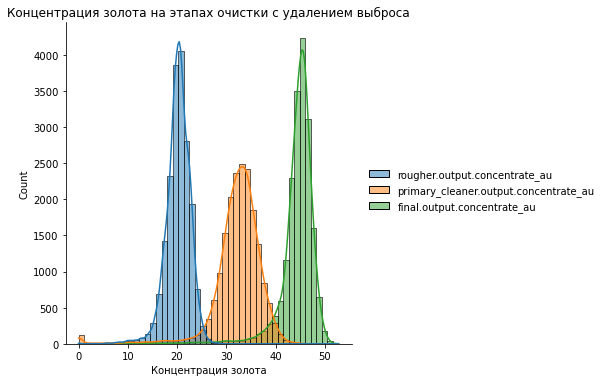

In [30]:
sns.displot(data=data_full[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']], 
            kind='hist', kde=True)
plt.title("Концентрация золота на этапах очистки с удалением выброса")
plt.xlabel("Концентрация золота")
plt.show()

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

In [31]:
data_full.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

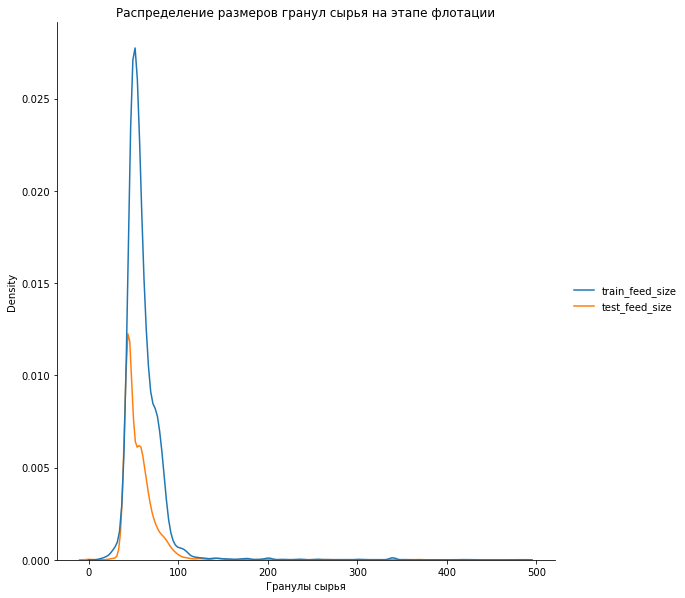

In [32]:
sns.displot(data=[data_train.rename(columns={'rougher.input.feed_size':'train_feed_size'})['train_feed_size'], 
                  data_test.rename(columns={'rougher.input.feed_size':'test_feed_size'})['test_feed_size']], 
            kind='kde', height= 8 )
plt.title("Распределение размеров гранул сырья на этапе флотации")
plt.xlabel("Гранулы сырья")
plt.show()

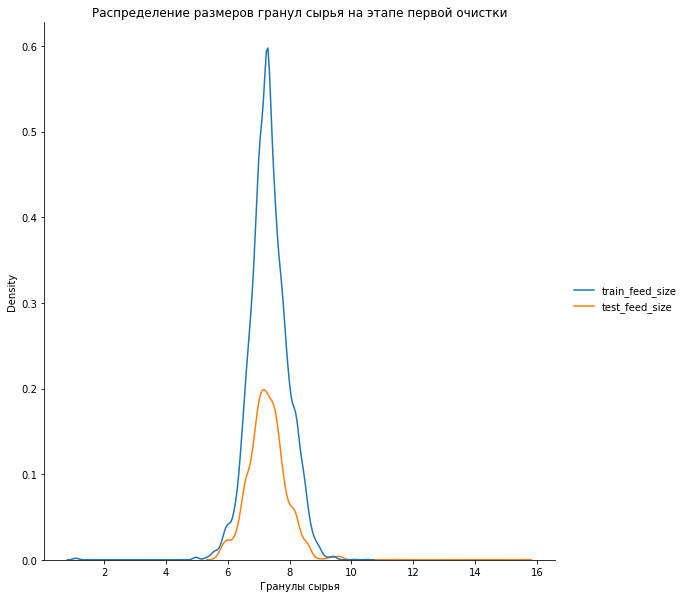

In [33]:
sns.displot(data=[data_train.rename(columns={'primary_cleaner.input.feed_size':'train_feed_size'})['train_feed_size'], 
                  data_test.rename(columns={'primary_cleaner.input.feed_size':'test_feed_size'})['test_feed_size']], 
            kind='kde', height= 8 )
plt.title("Распределение размеров гранул сырья на этапе первой очистки")
plt.xlabel("Гранулы сырья")
plt.show()

Распределения похожи, но имеют разную высоту из-за разного количества данных в датафреймах.

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Как было сказано в задание во флот. установку подается сырье, на выходе получается черновой вариант, который также проходит через какие-то изменения на 1 и 2 этапе очистки, финальный вариант уже получается после финального этапа.

Сначала построим распределения каждого признака, а затем посчитаю сумму.

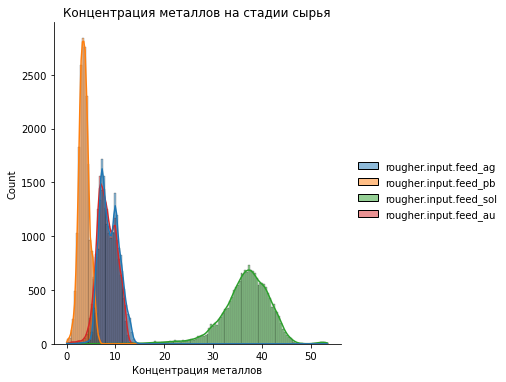

In [34]:
sns.displot(data=data_full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol','rougher.input.feed_au']], 
            kind='hist', kde=True)
plt.title("Концентрация металлов на стадии сырья")
plt.xlabel("Концентрация металлов")
plt.show()

Из заметных отклонений, можно заметить два подъема на входных значения серебра и золота, а также длинный хвост у распределения sol.     
    Для остальных металлов на других этапах очистки распеределения были построены выше, поэтому осталось только построить для sol.

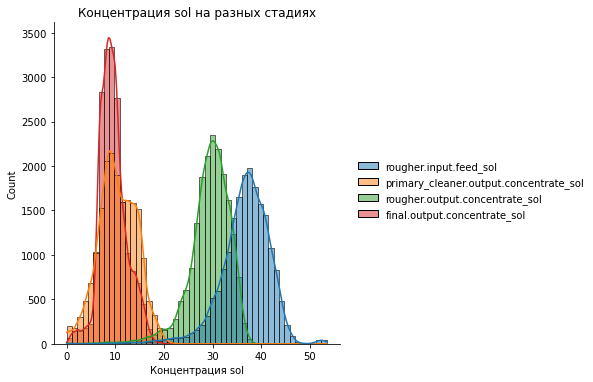

In [35]:
sns.displot(data=data_full[['rougher.input.feed_sol', 'primary_cleaner.output.concentrate_sol', 'rougher.output.concentrate_sol',  'final.output.concentrate_sol']], 
            kind='hist', kde=True)
plt.title("Концентрация sol на разных стадиях")
plt.xlabel("Концентрация sol")
plt.show()

Также есть небольшие хвосты и подъем на этапе первичной очистки

Поэтому сначала подсчитаем суммарную концентрацию на стадии сырья. Для этого возьмем столбцы 'rougher.input.feed_ag',     'rougher.input.feed_pb', 'rougher.input.feed_sol','rougher.input.feed_au' таблицы data_full.

In [36]:
sum_concent_raw = data_full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol','rougher.input.feed_au']].sum(axis=1)
sum_concent_raw

0        51.680034
1        50.659114
2        50.609929
3        51.061546
4        47.859163
           ...    
18843    53.415050
18844    53.696482
18845    54.589604
18846    54.027355
18847    53.535054
Length: 18848, dtype: float64

In [37]:
sum_concent_raw.mean()

57.321555698707236

Подсчитаем на черновом этапе. 

Из-за того, что немного неясно, что явялется черновым этапом (после этапа флотации или после этапа очистки), то расчитаем два варианта.

Для этого сначала возьмем значения концетратов на выходе этапа очистки 1.

In [38]:
sum_concent_draft = data_full[['primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au']].sum(axis=1)
sum_concent_draft

0        72.640924
1        72.543485
2        72.095042
3        59.957723
4        71.321010
           ...    
18843    59.001692
18844    59.703912
18845    59.561096
18846    57.216686
18847    55.748041
Length: 18848, dtype: float64

In [39]:
sum_concent_draft.mean()

61.07660930575207

И на выходе этапа флотации.

In [40]:
sum_concent_draft = data_full[['rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au']].sum(axis=1)
sum_concent_draft

0        66.424950
1        67.012710
2        66.103793
3        65.752751
4        65.908382
           ...    
18843    70.781325
18844    70.539603
18845    55.376330
18846    69.201689
18847    69.544003
Length: 18848, dtype: float64

In [41]:
sum_concent_draft.mean()

69.58915767857604

Подсчитаем на финальном этапе.

In [42]:
sum_concent_final=data_full[['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1)
sum_concent_final

0        63.644396
1        63.957723
2        64.311180
3        63.573449
4        64.004667
           ...    
18843    68.098589
18844    68.274362
18845    68.226068
18846    68.200449
18847    68.353154
Length: 18848, dtype: float64

In [43]:
sum_concent_final.mean()

69.01694159218285

Как можно заметить по среднему значению, концентрация всех веществ увеличивается по ходу очистки.

С учетом того, что ранее из full были удалены некотрые строки, то обновим train и test.

In [44]:
data_train=data_train.loc[data_train['date'].isin(data_full['date'])].reset_index(drop=True)
data_test=data_test.loc[data_test['date'].isin(data_full['date'])].reset_index(drop=True)

На данном этапе работы были исследованы распределения концентрации металлов на разных этапах очистки, выявлены и удалены выбросы. Также было проведено сравнение распределения гранул сырья на двух выборках: тестовой и тренировочной.

## Модель

Нужно спрогнозировать две величины: rougher.output.recovery и final.output.recovery.

Для прогнозирования rougher.output.recovery понадобятся только значения столбцов этапа флотации, так как остальные признаки уже будут отвечать за другие этапы и не влияют на значения rougher.output.recovery. Для final.output.recovery понадобятся все значения датасета.

In [45]:
data_train.head()

,date,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,68.116445,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,68.347543,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,66.927016,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Исправлю, что признаки train и test расположены в разном порядке. Синхронизировать порядок расположения признаков в таблицах.


In [46]:
data_test = data_test[data_train.columns]

In [47]:
def get_features_target(data, filter_column):
    if filter_column == 'rougher':
        return data.filter(regex=filter_column).drop(columns = [f'{filter_column}.output.recovery'],axis = 1), data[f'{filter_column}.output.recovery']
    elif filter_column == 'final':
        return data.drop(columns = [f'{filter_column}.output.recovery', 'date'],axis = 1),data[f'{filter_column}.output.recovery']
    else:
        'Неправильно введено имя столбца'

In [48]:
train_features_rougher, train_target_rougher = get_features_target(data_train, 'rougher')
test_features_rougher, test_target_rougher = get_features_target(data_test, 'rougher')
train_features_final, train_target_final = get_features_target(data_train, 'final')
test_features_final, test_target_final = get_features_target(data_test, 'final')

Также нормализуем features

In [49]:
def data_scaler(f_train, f_test):
    scaler = StandardScaler()
    return pd.DataFrame(data=scaler.fit_transform(f_train), index=f_train.index, columns=f_train.columns),pd.DataFrame(data=scaler.transform(f_test), index=f_test.index, columns=f_test.columns)

In [50]:
train_features_rougher, test_features_rougher = data_scaler(train_features_rougher, test_features_rougher)
train_features_final, test_features_final = data_scaler(train_features_final, test_features_final)

In [51]:
def get_smape(real, predict):
    result_sum = 0
    result_sum=((2*np.abs(np.subtract(predict, real))/(np.add(np.abs(real), np.abs(predict))))*100).mean()
    result_sum = 2.0 * np.mean(np.abs(predict - real) / (np.abs(predict) + np.abs(real))) * 100

    return result_sum

def total_smape(rougher_smape, final_smape):
    return 0.25*rougher_smape+0.75*final_smape

In [52]:
def model_param(name_model, f_train, t_train, list_iter=None):
    my_scorer = make_scorer(get_smape, greater_is_better=True)
    final_scores={}
    
    if name_model == 'Tree':
        print('DecisionTreeRegressor')
        for param in list_iter:
            model = DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=param)
            scores=cross_val_score(model, f_train, t_train, cv=3, scoring=my_scorer, n_jobs=-1, verbose=10) 
            print(f'Глубина:{param}, sMAPE: {sum(scores)/len(scores)}')
            
    elif name_model == 'Forest':
        print('RandomForestRegressor')
        for n in list_iter['count_tree']:
            for depth in list_iter['depth']:
                model = RandomForestRegressor(random_state=RANDOM_STATE, max_depth=depth, n_estimators=n)
                scores=cross_val_score(model, f_train, t_train, cv=3, scoring=my_scorer, n_jobs=-1, verbose=10)
                print(f'Глубина: {depth},Количество деревьев: {n}, sMAPE: {sum(scores)/len(scores)}')
        
    elif name_model == 'LinReg':
            print('LinearRegression')
            model = LinearRegression()
            scores=cross_val_score(model, f_train, t_train, cv=3, scoring=my_scorer, n_jobs=-1, verbose=10) 
            print(f'sMAPE: {sum(scores)/len(scores)}')
    else:
            return 'Неправильно введеное имя модели'

Выберем модель для предсказания rougher.output.recovery

In [53]:
model_param('LinReg', train_features_rougher, train_target_rougher)

LinearRegression


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


sMAPE: 8.650954618644809


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.0s finished


In [54]:
depth = [None] + [i for i in range(2, 11)]
model_param('Tree', train_features_rougher, train_target_rougher, depth)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


DecisionTreeRegressor


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:None, sMAPE: 10.392660184143633


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:2, sMAPE: 8.018126593327102


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:3, sMAPE: 8.094083117842615


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1324s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:4, sMAPE: 8.765990193288653
Глубина:5, sMAPE: 8.81494189205326


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0921s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0976s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:6, sMAPE: 9.079521292394757


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1369s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:7, sMAPE: 9.508809194768084


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1368s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:8, sMAPE: 9.324529674651387


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1487s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:9, sMAPE: 9.211905459166301
Глубина:10, sMAPE: 8.94078841695088


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1648s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


In [55]:
depth = [None] + [i for i in range(2, 11, 2)]
count_tree=range(100, 300, 100)
model_param('Forest', train_features_rougher, train_target_rougher, {'count_tree':count_tree, 'depth':depth})

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


RandomForestRegressor


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: None,Количество деревьев: 100, sMAPE: 8.061708477227485


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 2,Количество деревьев: 100, sMAPE: 7.635949239990986


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 4,Количество деревьев: 100, sMAPE: 7.715823645593962


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 6,Количество деревьев: 100, sMAPE: 7.721079793381108


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 8,Количество деревьев: 100, sMAPE: 7.843285356112305


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 10,Количество деревьев: 100, sMAPE: 7.959243537401286


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: None,Количество деревьев: 200, sMAPE: 8.106311771987627


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 2,Количество деревьев: 200, sMAPE: 7.670727091617942


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 4,Количество деревьев: 200, sMAPE: 7.770513317561533


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 6,Количество деревьев: 200, sMAPE: 7.725060896967755


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 8,Количество деревьев: 200, sMAPE: 7.916134095372804
Глубина: 10,Количество деревьев: 200, sMAPE: 8.020893457720875


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.4s finished


Лучшей моделью оказалась модель случайного леса. Гиперпараметры выберем равные глубине 2 и кол-ва деревьев 100, так как при таких значениях модель показала одно из минимальных значение метрики при условии минимальных значений гиперпараметров (т.е. более быстрого обучение).

In [56]:
model = RandomForestRegressor(random_state=RANDOM_STATE, max_depth=2, n_estimators=100)
predicted_roughet = model.fit(train_features_rougher, train_target_rougher).predict(test_features_rougher)
score_rougher = get_smape(test_target_rougher, predicted_roughet)
print(f'sMAPE: {score_rougher}')

sMAPE: 5.746011763945562


In [57]:
model = RandomForestRegressor(random_state=RANDOM_STATE, max_depth=3, n_estimators=100)
predicted_roughet = model.fit(train_features_rougher, train_target_rougher).predict(test_features_rougher)
score_rougher = get_smape(test_target_rougher, predicted_roughet)
print(f'sMAPE: {score_rougher}')

sMAPE: 5.004652538558445


Проверим наше модель на адекватность.

In [58]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(train_features_rougher, train_target_rougher)
predict_dummy = dummy_regr.predict(test_features_rougher)
print(f'sMAPE константной модели: { get_smape(test_target_rougher, predict_dummy)}')

sMAPE константной модели: 5.364780952068212


In [59]:
pd.DataFrame(data={'pred':pd.Series(predicted_roughet), 'real':test_target_rougher})

,pred,real
0,84.707391,89.993421
1,84.707391,88.089657
2,84.707391,88.412756
3,84.707391,87.360133
4,84.707391,83.236367
...,...,...
5118,92.431324,95.172585
5119,92.431324,94.575036
5120,92.431324,93.018138
5121,92.431324,92.599042


Выберем модель для предсказания final.output.recovery

In [60]:
model_param('LinReg', train_features_final, train_target_final)

LinearRegression
sMAPE: 9.359131189360498


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0479s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [61]:
depth = [None] + [i for i in range(2, 11)]
model_param('Tree', train_features_final, train_target_final, depth)

DecisionTreeRegressor


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:None, sMAPE: 17.54984325779373


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1392s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:2, sMAPE: 8.925559726907501


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1415s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:3, sMAPE: 9.902021008910474


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1645s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:4, sMAPE: 11.87676266269225


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:5, sMAPE: 11.788669238676869


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:6, sMAPE: 13.303021745009353


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:7, sMAPE: 16.055169503610827


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:8, sMAPE: 14.41875947426243


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина:9, sMAPE: 15.04230181540042
Глубина:10, sMAPE: 16.765211546162817


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished


In [62]:
depth = [None] + [i for i in range(2, 11, 2)]
count_tree=range(100, 300, 100)
model_param('Forest', train_features_final, train_target_final, {'count_tree':count_tree, 'depth':depth})

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


RandomForestRegressor


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: None,Количество деревьев: 100, sMAPE: 9.954084497226333


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 2,Количество деревьев: 100, sMAPE: 8.560315217478356


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 4,Количество деревьев: 100, sMAPE: 9.143222611475437


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   14.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 6,Количество деревьев: 100, sMAPE: 9.235650684593148


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 8,Количество деревьев: 100, sMAPE: 9.45575099707468


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 10,Количество деревьев: 100, sMAPE: 9.675532726377796


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: None,Количество деревьев: 200, sMAPE: 10.042438985858734


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 2,Количество деревьев: 200, sMAPE: 8.540928926405776


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 4,Количество деревьев: 200, sMAPE: 9.191738870637662


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 6,Количество деревьев: 200, sMAPE: 9.28061091715751


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   39.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Глубина: 8,Количество деревьев: 200, sMAPE: 9.475262077473223
Глубина: 10,Количество деревьев: 200, sMAPE: 9.73615496324805


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   47.1s finished


Лучшей моделью стала RandomForestRegressor с глубиной 2 и кол-вом деревьев = 100

In [63]:
model = RandomForestRegressor(random_state=RANDOM_STATE, max_depth=2, n_estimators=100)
predicted_final = model.fit(train_features_final, train_target_final).predict(test_features_final)
score_final = get_smape(test_target_final, predicted_final)
print(f'sMAPE: {score_final}')

sMAPE: 6.594991132981777


Проверим наше модель на адекватность.

In [64]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(train_features_final, train_target_final)
predict_dummy = dummy_regr.predict(test_features_final)
print(f'sMAPE константной модели: { get_smape(test_target_final, predict_dummy)}')

sMAPE константной модели: 8.582525522731482


In [65]:
pd.DataFrame(data={'pred':pd.Series(predicted_final), 'real':test_target_final})

,pred,real
0,71.162919,70.273583
1,69.369436,68.910432
2,69.940795,68.143213
3,69.020697,67.776393
4,63.721430,61.467078
...,...,...
5118,72.982850,68.919891
5119,72.982850,68.440582
5120,72.982850,67.092759
5121,72.982850,68.061186


Итоговая метрика 

In [66]:
total_smape(score_rougher, score_final)

6.197406484375945

В даной работе были проведены исследвование входных данных и построенна модель для расчета коэффициент восстановления золота из золотосодержащей руды. В ходе исследования данных проводилась требующаяся проработка для дальнейшей использования для обучения модели, также рассматривались распределения на поиск выбивающихся значений. Поиск лучшей модели происходил из линейной регрессии, случайного леса и дерева решений, по результату которого лучшей моделью оказалась модель случайного леса. В итоге была подсчитала финальная метрика, которая содержала в себе значение метрик эффективности обогащения чернового и финального концентратов. 